## Introduction to Machine Learning

### Supervised Learning Algorithms
* Decision Trees
* Multi-layer perceptron
* k-NN

#### Final Project - wine quality classification problem

In [1437]:
# Importing the libraries
# generic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1438]:
# Utilities
def data_scaler(data):
    scaler = preprocessing.MinMaxScaler()
    data = scaler.fit_transform(data)
    return data
def quality_labeller(data, bins=(2.9,5.9,8), labels=None):
    if labels is None:
        labels = ['bad', 'good']
    df_quality = pd.cut(df_red['quality'],
                           bins = bins,
                           labels = labels)
    data.loc[:,'quality_label'] = df_quality
    return data
def delete_radomly_x(data, x=0.1):
    # get dimensions of df
    nrows, ncols = data.shape

    volume = nrows * ncols                    # total number of entries in data
    volume_to_be_nan = int(volume * x)      # number of entries to turn to NaN (10 %)

    # randomly generate index locations for the new NaNs
    indices = np.random.randint(volume, size=volume_to_be_nan)
    row_indices = indices % nrows
    col_indices = (indices / nrows).astype(int)

    # assign NaN to each of the indices in data
    for ri, ci in zip(row_indices, col_indices):
      data.iloc[ri, ci] = np.nan

##### Read Red Wine

In [1439]:
df_red = pd.read_csv("winequality-red.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### Analysing

In [1440]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1441]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###### Delete data 10 and 20%

In [1442]:
delete_radomly_x(df_red)
df_red.isna().sum()

fixed acidity           148
volatile acidity        161
citric acid             153
residual sugar          161
chlorides               140
free sulfur dioxide     158
total sulfur dioxide    154
density                 146
pH                      126
sulphates               149
alcohol                 167
quality                 151
dtype: int64

* strategy 1 - Deleting Rows

In [1443]:
df_red.dropna(inplace=True)
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1444]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 1596
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         460 non-null    float64
 1   volatile acidity      460 non-null    float64
 2   citric acid           460 non-null    float64
 3   residual sugar        460 non-null    float64
 4   chlorides             460 non-null    float64
 5   free sulfur dioxide   460 non-null    float64
 6   total sulfur dioxide  460 non-null    float64
 7   density               460 non-null    float64
 8   pH                    460 non-null    float64
 9   sulphates             460 non-null    float64
 10  alcohol               460 non-null    float64
 11  quality               460 non-null    float64
dtypes: float64(12)
memory usage: 46.7 KB


* strategy 2 - Replacing With Mean

In [1445]:
# restore data
df_red = pd.read_csv("winequality-red.csv")
# delete 20%
delete_radomly_x(df_red, 0.2)
df_red.isna().sum()

fixed acidity           280
volatile acidity        278
citric acid             286
residual sugar          277
chlorides               296
free sulfur dioxide     288
total sulfur dioxide    311
density                 283
pH                      304
sulphates               314
alcohol                 275
quality                 291
dtype: int64

In [1446]:
for column in df_red.columns:
    mean = df_red[column].mean()
    df_red[column] = df_red[column].replace(np.NaN, mean)
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1447]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


<AxesSubplot:>

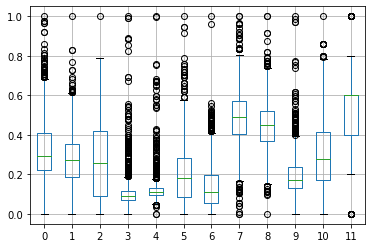

In [1448]:
# restore data
df_red = pd.read_csv("winequality-red.csv")
# normalize to detect outliers
min_max_scaler = preprocessing.MinMaxScaler()
df_red_scaled = pd.DataFrame(data_scaler(df_red.values))
df_red_scaled.boxplot()

In [1449]:
#columns
i = 0
for column in df_red.columns:
    print(f'{i}: {column}',end=',')
    i += 1

0: fixed acidity,1: volatile acidity,2: citric acid,3: residual sugar,4: chlorides,5: free sulfur dioxide,6: total sulfur dioxide,7: density,8: pH,9: sulphates,10: alcohol,11: quality,

* we don't have missing values (null cases)
* there are some outliers that means data < 25th and > 75th

###### Data cleaning

Z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

A z-score can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). In order to use a z-score, you need to know the mean μ and also the population standard deviation σ.

In [1450]:
# remove outliers
z_scores = zscore(df_red)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_red_new = df_red[filtered_entries]
df_red_new.shape

(1451, 12)

###### Data normalization

In [1451]:
x = df_red_new.iloc[:,:-1]
y = df_red_new.iloc[:,-1]
df_x = pd.DataFrame(data_scaler(x.values), columns=df_red.columns[:-1])
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.176471
1,0.329412,0.826087,0.000000,0.254545,0.319149,0.521739,0.438849,0.495327,0.367816,0.421687,0.254902
2,0.329412,0.695652,0.050633,0.200000,0.287234,0.304348,0.345324,0.514019,0.436782,0.385542,0.254902
3,0.729412,0.173913,0.708861,0.127273,0.196809,0.347826,0.388489,0.607477,0.321839,0.301205,0.254902
4,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.176471
...,...,...,...,...,...,...,...,...,...,...,...
1446,0.141176,0.521739,0.101266,0.145455,0.276596,0.673913,0.273381,0.317757,0.655172,0.301205,0.392157
1447,0.105882,0.467391,0.126582,0.181818,0.127660,0.826087,0.323741,0.338318,0.735632,0.518072,0.529412
1448,0.152941,0.423913,0.164557,0.200000,0.202128,0.608696,0.244604,0.396262,0.620690,0.506024,0.490196
1449,0.105882,0.570652,0.151899,0.145455,0.196809,0.673913,0.273381,0.371028,0.793103,0.457831,0.333333


In [1452]:
df_y = pd.DataFrame(y)
# df_y

In [1453]:
qualities = ['quality', 'quality_label']
df_y_s = quality_labeller(df_y)
df_y = df_y_s.iloc[:,-1]
df_y_s

,quality,quality_label
0,5,bad
1,5,bad
2,5,bad
3,6,good
4,5,bad
...,...,...
1594,5,bad
1595,6,good
1596,6,good
1597,5,bad


###### Splitting data

In [1454]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size = 0.3,random_state = 0)

In [1455]:
print(f'Training set has {x_train.shape[0]} samples')
print(f'Testing set has {x_test.shape[0]} samples')

Training set has 1015 samples
Testing set has 436 samples


###### Decision Trees

In [1456]:
decision_tree = DecisionTreeClassifier(random_state = 0)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)

In [1457]:
decision_tree_report = classification_report(y_test, y_pred_decision_tree, output_dict=True)
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

         bad       0.70      0.74      0.72       189
        good       0.79      0.76      0.77       247

    accuracy                           0.75       436
   macro avg       0.74      0.75      0.74       436
weighted avg       0.75      0.75      0.75       436



<AxesSubplot:>

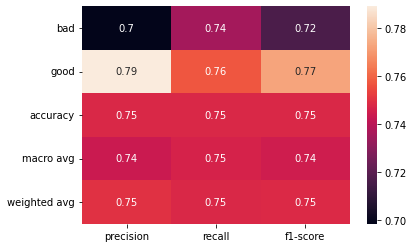

In [1458]:
sns.heatmap(pd.DataFrame(decision_tree_report).iloc[:-1, :].T, annot=True)

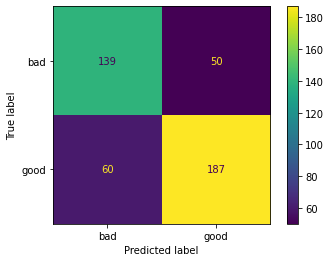

In [1459]:
cm = confusion_matrix(y_test, y_pred_decision_tree, labels=['bad', 'good'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot()
plt.show()

###### Multi-layer perceptron

In [1460]:
mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(x_train, y_train)
y_pred_mlp = mlp_classifier.predict(x_test)

In [1461]:
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True)
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         bad       0.68      0.77      0.72       189
        good       0.80      0.72      0.76       247

    accuracy                           0.74       436
   macro avg       0.74      0.74      0.74       436
weighted avg       0.75      0.74      0.74       436



<AxesSubplot:>

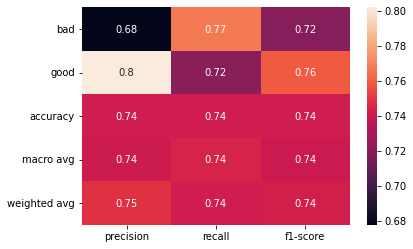

In [1462]:
sns.heatmap(pd.DataFrame(mlp_report).iloc[:-1, :].T, annot=True)

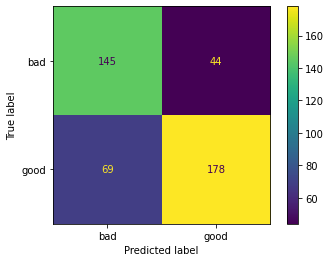

In [1463]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=['bad', 'good'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot()
plt.show()

###### k-NN

In [1464]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [1465]:
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         bad       0.67      0.67      0.67       189
        good       0.75      0.75      0.75       247

    accuracy                           0.72       436
   macro avg       0.71      0.71      0.71       436
weighted avg       0.72      0.72      0.72       436



<AxesSubplot:>

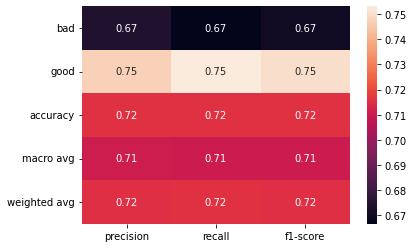

In [1466]:
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)

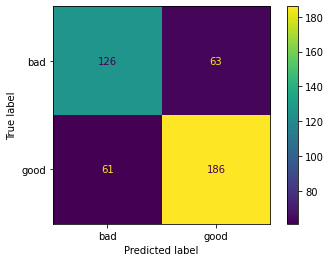

In [1467]:
cm = confusion_matrix(y_test, y_pred_knn, labels=['bad', 'good'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot()
plt.show()